In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss, generateUniform
from utils.integral import grid
from Models.clustering import FCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF, temp, plot_silhouette_values, plot_CVI_with_k

In [3]:
import numpy as np
import matplotlib.pyplot as plt

bandwidth = 0.01
grid_x = np.arange(-8, 18 + bandwidth, bandwidth)

# ----- các giá trị cần thử -----
IR_list  = [1, 5, 10, 20]
std_list = [0.3,0.5,0.8]
# --------------------------------

np.random.seed(42)

for IR in IR_list:
    for std in std_list:
        # ---------- tạo dữ liệu ----------
        n1, n2 = 10, int(IR * 10)
        mu1 = np.random.normal(0, std, n1)
        mu2 = np.random.normal(8, std, n2)
        sig1 = np.ones_like(mu1)
        sig2 = np.ones_like(mu2)

        F1 = generateGauss(mu1, sig1, grid_x)
        F2 = generateGauss(mu2, sig2, grid_x)
        F_data = np.vstack([F1, F2])

        # ---------- FCF ----------
        cluster = FCF.Model(
            grid_x=grid_x,
            seed=42,
            num_clusters=2,
            fuzziness=2,
            max_iterations=100,
            tolerance=1e-6,
            distance_metric='L2',
            verbose=False
        )
        cluster.fit(F_data)
        U, Theta, J = cluster.get_results()
        labels = cluster.get_hard_assignments()

      #   ---------- vẽ ----------
        plt.figure(figsize=(5,5))
        temp(fontsize=20)
        for i in range(F_data.shape[0]):
            ls = '-.' if labels[i] == 0 else ':'
            color = 'lightgray' if labels[i] == 0 else 'dimgray'
            plt.plot(grid_x, F_data[i], lw=2, color=color, linestyle=ls, alpha=0.7)

        for j in range(cluster.num_clusters):
            plt.plot(grid_x, Theta[j], lw=3, linestyle='-', color='black')

        fname = f"FCF_IR{IR}_STD{std}.pdf"
        plt.savefig(fname, bbox_inches='tight')
        plt.close()          # tránh hiển thị hàng loạt cửa sổ
# F_data.shape

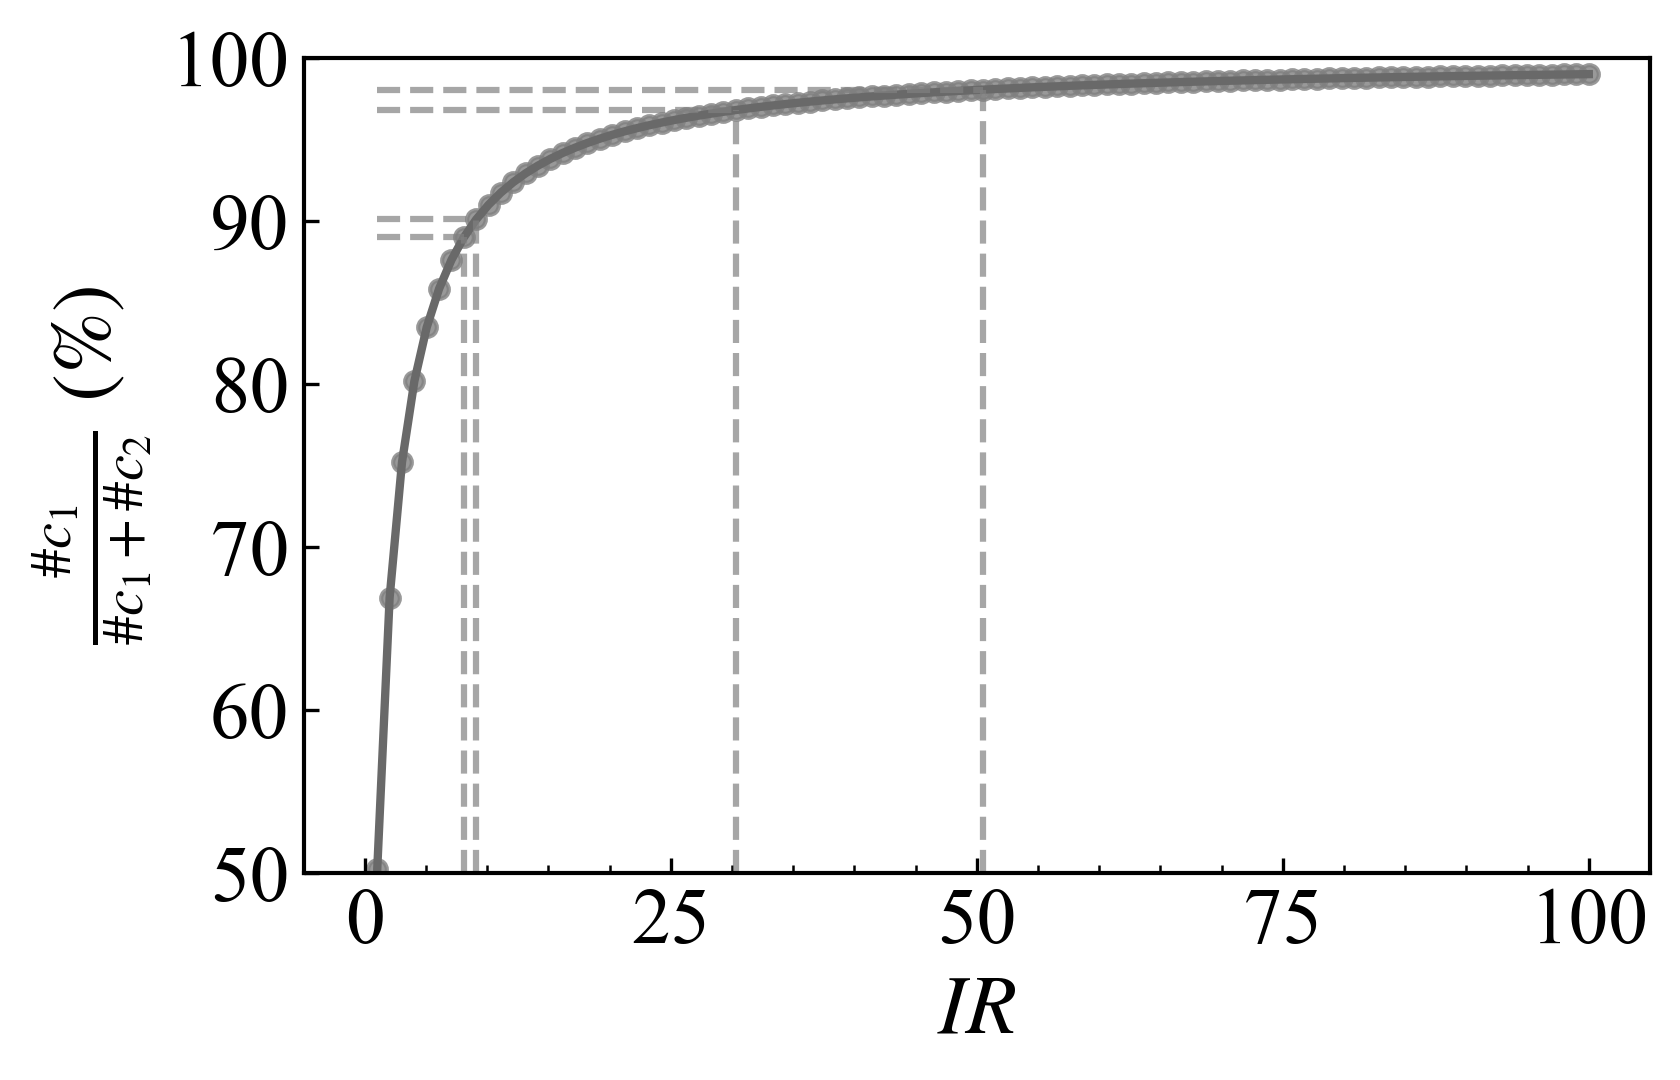

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt


k_vals = np.linspace(0, 100, 100)        # k từ 0 → 50
ratio  = (k_vals / (k_vals + 1)) *100

plt.figure(figsize=(6,4))
temp(20)
plt.plot(k_vals, ratio, lw=2, color='dimgray')
plt.scatter(k_vals, ratio, s=20, marker='o', color='gray',alpha=.8)
plt.ylim(50,100)
plt.xlabel(r'$IR$')
plt.ylabel(r'$\frac{\# c_1}{\# c_1+\# c_2}\,\,(\%)$')
# ---------- giống dọc & ngang ----------

# ---------- thay thế idx cũ ----------
# ---------- cùng một ratio ----------
desired_ratio = 90.0                       # %
k_exact = desired_ratio / (100 - desired_ratio)

# tìm 2 chỉ số gần k_exact nhất
abs_diff = np.abs(k_vals - k_exact)
idx_pair = np.argsort(abs_diff)[:2]        # 2 chỉ số gần nhất

# thay thế [10,12] hoặc [30,50] tùy ý
idx = [idx_pair[0], idx_pair[1], 30, 50]   # ví dụ thay cặp đầu
k_lines = k_vals[idx]      # k thực tế
r_lines = ratio[idx]          # ratio tương ứng

# ---------- giống dọc & ngang (cắt cạnh thừa) ----------
y0 = 50          # giới hạn trục y bạn đang dùng
x0 = 1           # giới hạn trục x bạn đang dùng

for k, r in zip(k_lines, r_lines):
    # đoạn dọc
    plt.vlines(k, y0, r, color='gray', lw=1.5, ls='--', alpha=0.7)
    # đoạn ngang
    plt.hlines(r, x0, k, color='gray', lw=1.5, ls='--', alpha=0.7)
plt.tight_layout()
plt.savefig('ratio_C1_k.pdf',bbox_inches="tight")
plt.show()